In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report, confusion_matrix
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping,Callback,CSVLogger
from keras.models import Sequential, load_model,Model , clone_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Reshape, Input
from keras.preprocessing.text import Tokenizer
from keras.losses import BinaryCrossentropy
from keras.backend import clear_session
from keras.initializers import Constant
from threading import current_thread
from keras.utils import plot_model
from sklearn.utils import shuffle
from keras.optimizers import Adam
from keras.utils import Sequence
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras import backend as K
from numpy.linalg import norm
from functools import partial
from random import uniform
from numpy import asarray
from copy import deepcopy
import concurrent.futures
from keras import layers
import matplotlib as mpl
from keras import Model
from numpy import save
from numpy import load
import seaborn as sns
from time import time
import pandas as pd
import numpy as np
import collections
import statistics
import warnings
import tempfile
import logging
import urllib
import random
import pickle
import pydot
import torch
import math
import html
import nltk
import os
import re
import gc

random.seed(10)
warnings.filterwarnings("ignore")
np.random.seed(123)
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
par_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Hiden"
model_info_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch3/Model info"
results_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch3"
data_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/DataSets"

In [14]:
def _replaceitem(x):
    if type(x) is list:
        if x[0]<0.7:return 0.0
    else:
        x=float(x)
        if x<0.7:return 0.0
    return 1.0

In [7]:
def save_object(obj, filename,path):
    """
    _ INPUT (obj) THE OBJECT WE NEED SAVW IT (filename) THE NAME OF OBJECT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

In [8]:
def load_object(filename,path):
    """
    _ INPUT THE NAME OF OBJECT WE NEED LOAD IT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [32]:
def finder(metric):
  result = pd.read_csv(os.path.join(os.path.join(results_path,'Imges'),"Numerical results.csv"))
  return result[result['Method_name']=='ALC'][metric].tolist(),result[result['Method_name']=='OA-OT'][metric].tolist(),result[result['Method_name']=='AC'][metric].tolist()

In [27]:
number_of_chunk =[i[:-4] for i in os.listdir(par_path)[::-1] if i[:7]=='X_train']
number_of_chunk = number_of_chunk[:-1]

In [92]:
def plot_dimensional_reduction(metric):
  softmax,single_agent,average = finder(metric)
  # set width of bar
  barWidth = 0.1
  fig = plt.subplots(figsize =(12, 4))
  # Set position of bar on X axis
  br1 = np.arange(len(softmax))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]
  # Make the plot

  plt.bar(br1, softmax, color ='g', width = barWidth,edgecolor ='grey', label ='ALC')
  plt.bar(br2, single_agent, color ='b', width = barWidth,edgecolor ='grey', label ='OA-OT')
  plt.bar(br3, average, color ='y', width = barWidth,edgecolor ='grey', label ='AC')
  # Adding Xticks
  plt.xlabel('Chunk number', fontweight ='bold', fontsize = 12)
  plt.ylabel(metric, fontweight ='bold', fontsize = 12)
  plt.xticks([r + barWidth for r in range(len(number_of_chunk))],[str(i) for i,_ in enumerate(number_of_chunk)])
  plt.legend(loc="best")
  # plt.savefig(os.path.join(os.path.join(results_path,'Imges'),"Dimensional reduction amount"))
  # plt.savefig(os.path.join(os.path.join(results_path,'Imges'),"Dimensional reduction amount.svg"),format='svg')
  plt.show()

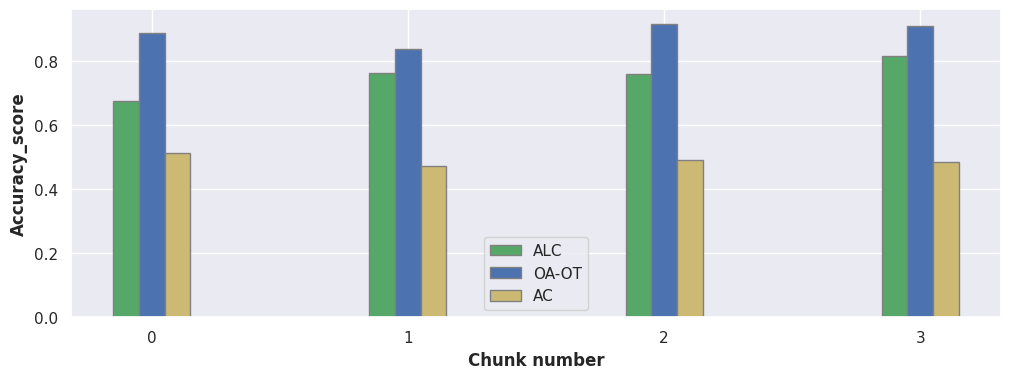

In [93]:
plot_dimensional_reduction('Accuracy_score')

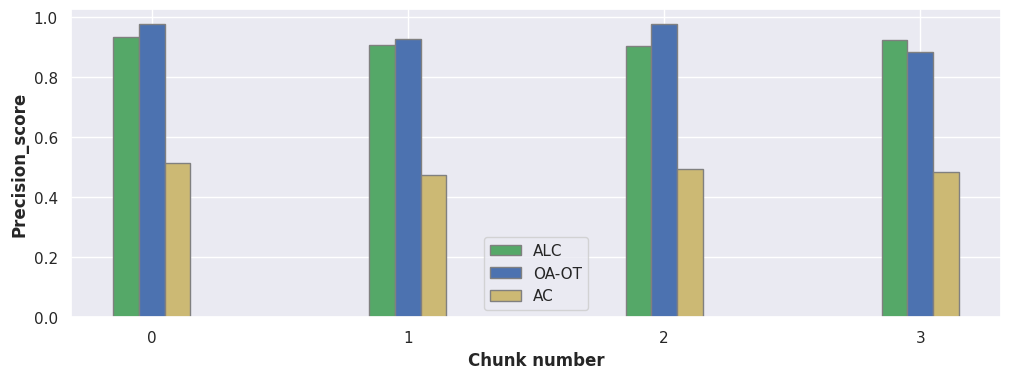

In [94]:
plot_dimensional_reduction('Precision_score')

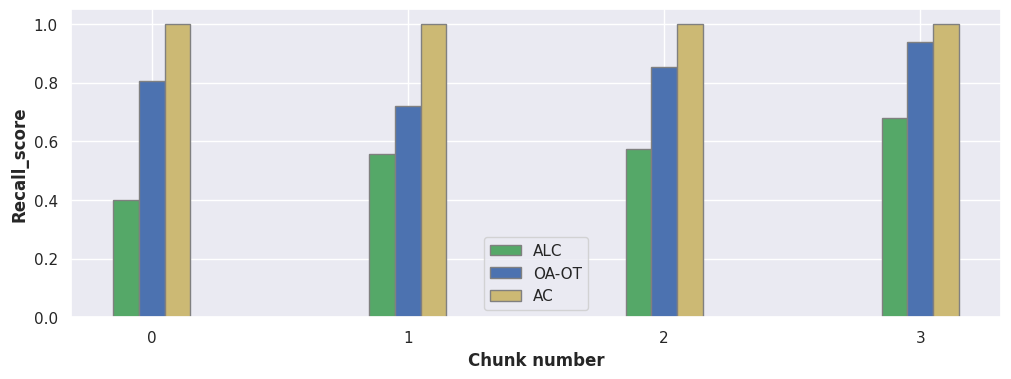

In [95]:
plot_dimensional_reduction('Recall_score')

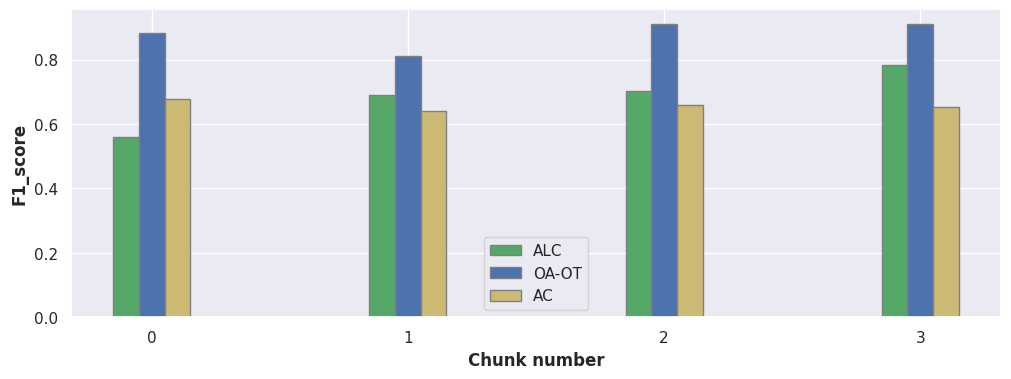

In [96]:
plot_dimensional_reduction('F1_score')

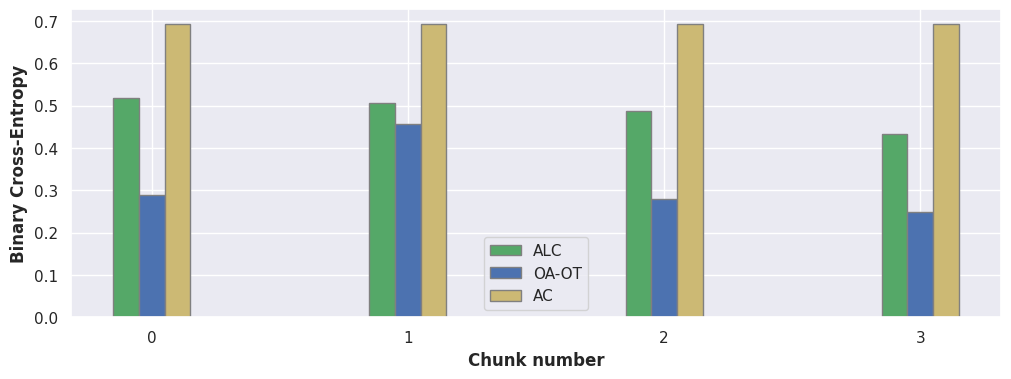

In [97]:
plot_dimensional_reduction('Binary Cross-Entropy')

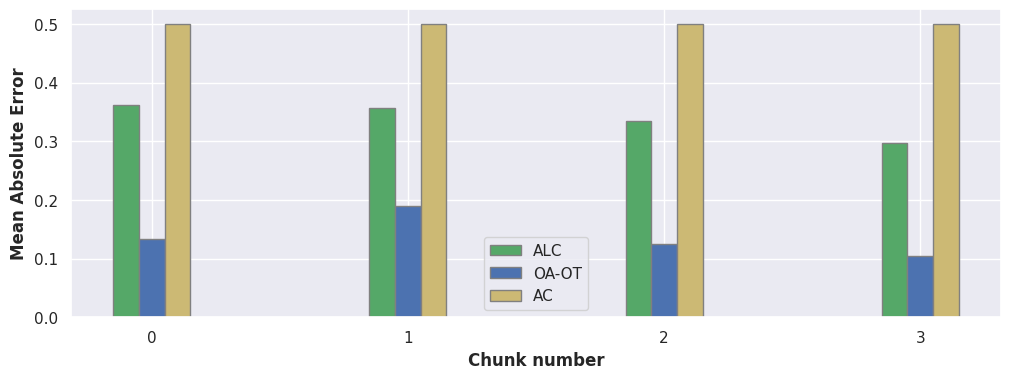

In [98]:
plot_dimensional_reduction('Mean Absolute Error')

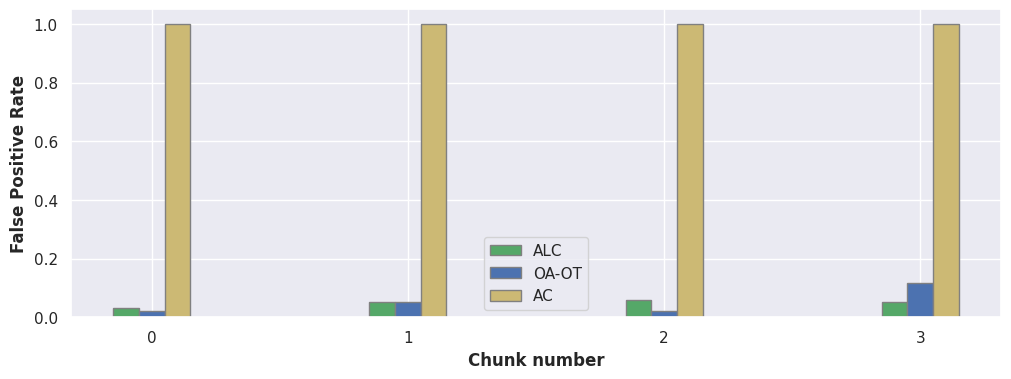

In [99]:
plot_dimensional_reduction('False Positive Rate')

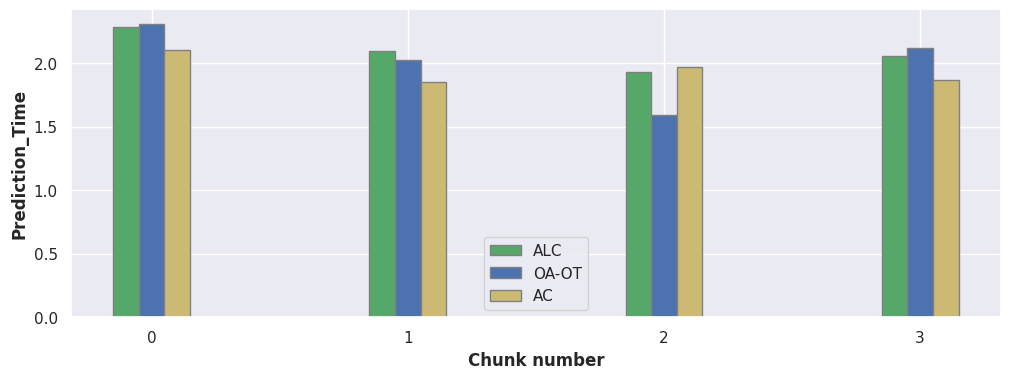

In [100]:
plot_dimensional_reduction('Prediction_Time')